In [2]:
!pip install pandas-profiling==2.7.1

In [26]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from string import digits
from pandas_profiling import ProfileReport
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("customer_retention_dataset.xlsx")
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [4]:
df.shape #no. of columns and rows

(269, 71)

In [5]:
df.columns = df.columns.str.replace('\t','') #tab spaces are removed

In [6]:
remove_digs = str.maketrans('', '', digits) #unnecessary digits are removed
df.columns = df.columns.str.translate(remove_digs)

In [7]:
df.columns = df.columns.str.strip() #leading & trailing spaces are removed

In [8]:
pd.set_option("display.max_columns",None) #options are set to show max rows & columns
pd.set_option("display.max_rows", None)

In [9]:
df.head()

Gender of respondent How old are you? Which city do you shop online from?  \
0                 Male      31-40 years                               Delhi   
1               Female      21-30 years                               Delhi   
2               Female      21-30 years                       Greater Noida   
3                 Male      21-30 years                             Karnal    
4               Female      21-30 years                          Bangalore    

   What is the Pin Code of where you shop online from?  \
0                                             110009     
1                                             110030     
2                                             201308     
3                                             132001     
4                                             530068     

  Since How Long You are Shopping Online ?  \
0                            Above 4 years   
1                            Above 4 years   
2                                3-4 years   
3                                3-4 years   
4                                2-3 years   

  How many times you have made an online purchase in the past  year?  \
0                                        31-40 times                   
1                                 41 times and above                   
2                                 41 times and above                   
3                                 Less than 10 times                   
4                                        11-20 times                   

  How do you access the internet while shopping on-line?  \
0                                            Dial-up       
1                                              Wi-Fi       
2                                    Mobile Internet       
3                                    Mobile Internet       
4                                              Wi-Fi       

  Which device do you use to access the online shopping?  \
0                                            Desktop       
1                                         Smartphone       
2                                         Smartphone       
3                                         Smartphone       
4                                         Smartphone       

  What is the screen size of your mobile device?  \
0                                         Others   
1                                     4.7 inches   
2                                     5.5 inches   
3                                     5.5 inches   
4                                     4.7 inches   

  What is the operating system (OS) of your device?  \
0                             Window/windows Mobile   
1                                           IOS/Mac   
2                                           Android   
3                                           IOS/Mac   
4                                           IOS/Mac   

  What browser do you run on your device to access the website?  \
0                                      Google chrome              
1                                      Google chrome              
2                                      Google chrome              
3                                             Safari              
4                                             Safari              

  Which channel did you follow to arrive at your favorite online store for the first time?  \
0                                      Search Engine                                         
1                                      Search Engine                                         
2                                      Search Engine                                         
3                                      Search Engine                                         
4                                  Content Marketing                                         

  After first visit, how do you reach the online retail store?  \
0                                      Search Engine             
1 

In [10]:
df.columns.values #checking columns values

array(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

In [11]:
df.dtypes

Gender of respondent                                                                                         object
How old are you?                                                                                             object
Which city do you shop online from?                                                                          object
What is the Pin Code of where you shop online from?                                                           int64
Since How Long You are Shopping Online ?                                                                     object
How many times you have made an online purchase in the past  year?                                           object
How do you access the internet while shopping on-line?                                                       object
Which device do you use to access the online shopping?                                                       object
What is the screen size of your mobile device?                          

In [12]:
df.isnull().sum().any()

False

In [13]:
df.nunique() #all columns are categorical

Gender of respondent                                                                                          2
How old are you?                                                                                              5
Which city do you shop online from?                                                                          11
What is the Pin Code of where you shop online from?                                                          39
Since How Long You are Shopping Online ?                                                                      5
How many times you have made an online purchase in the past  year?                                            6
How do you access the internet while shopping on-line?                                                        4
Which device do you use to access the online shopping?                                                        4
What is the screen size of your mobile device?                                                          

# EDA

In [13]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/83 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='Gender of respondent'>

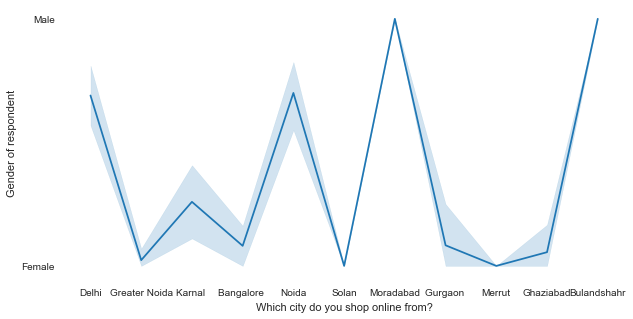

In [35]:
plt.figure(figsize=(10,5))
sn.lineplot(df['Which city do you shop online from?'],
              df['Gender of respondent'])

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

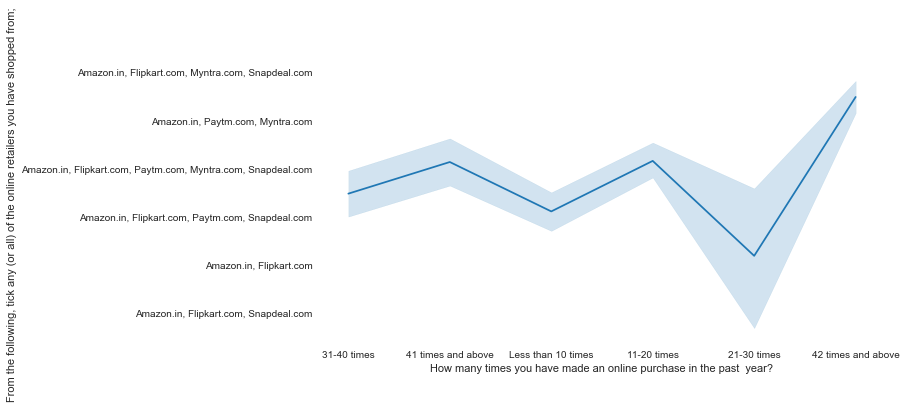

In [46]:
plt.figure(figsize=(10,5))
sn.lineplot(df['How many times you have made an online purchase in the past  year?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

<AxesSubplot:xlabel='How old are you?', ylabel='Gender of respondent'>

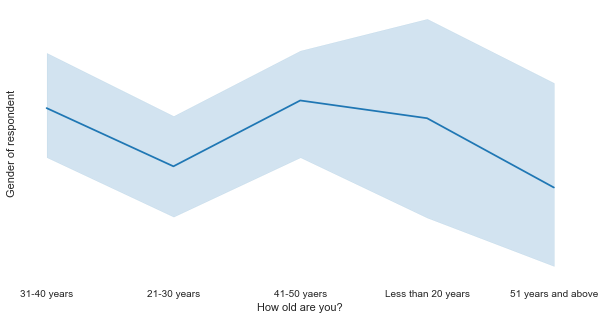

In [76]:
plt.figure(figsize=(10,5))
sn.lineplot(df['How old are you?'],
              df['Gender of respondent'])

<AxesSubplot:xlabel='How old are you?', ylabel='Since How Long You are Shopping Online ?'>

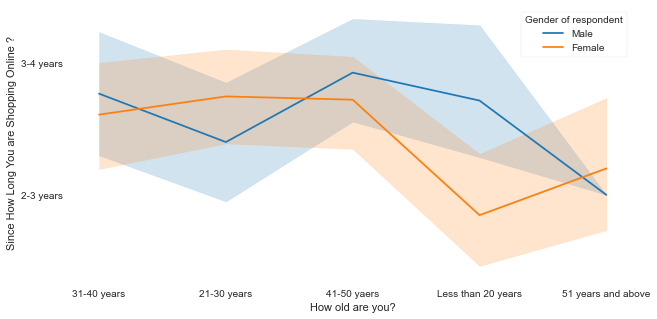

In [43]:
plt.figure(figsize=(10,5))
sn.lineplot(df['How old are you?'],
              df['Since How Long You are Shopping Online ?'], hue=df['Gender of respondent'] )

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='Since How Long You are Shopping Online ?'>

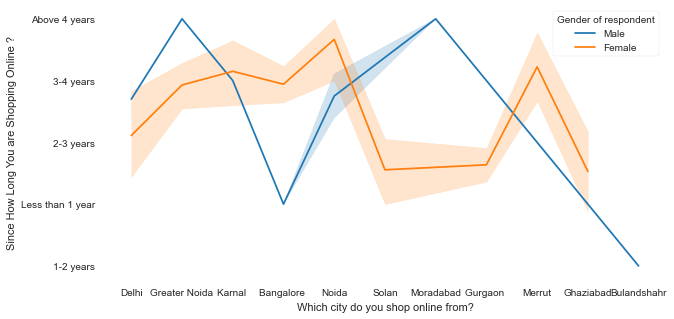

In [44]:
plt.figure(figsize=(10,5))
sn.lineplot(df['Which city do you shop online from?'],df['Since How Long You are Shopping Online ?'],hue=df['Gender of respondent'])

# EASE OF ACCESSING THE WEBSITE

<AxesSubplot:title={'center':'website loading period'}, xlabel='Longer time in displaying graphics and photos (promotion, sales period)', ylabel='Longer page loading time (promotion, sales period)'>

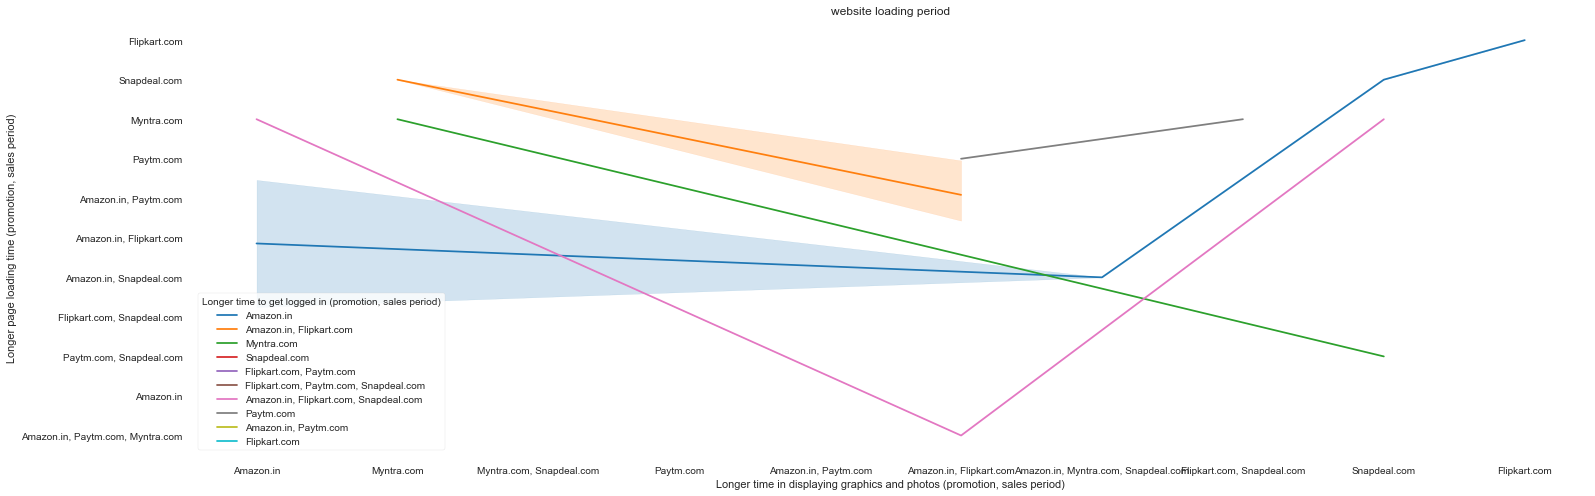

In [61]:
plt.figure(figsize=(25,8))
plt.title('website loading period')
sn.lineplot(df['Longer time in displaying graphics and photos (promotion, sales period)'],df['Longer page loading time (promotion, sales period)'],hue=df['Longer time to get logged in (promotion, sales period)'])

<AxesSubplot:title={'center':'website feasibility from customer perspective'}, xlabel='Shopping online is convenient and flexible', ylabel='Easy to use website or application'>

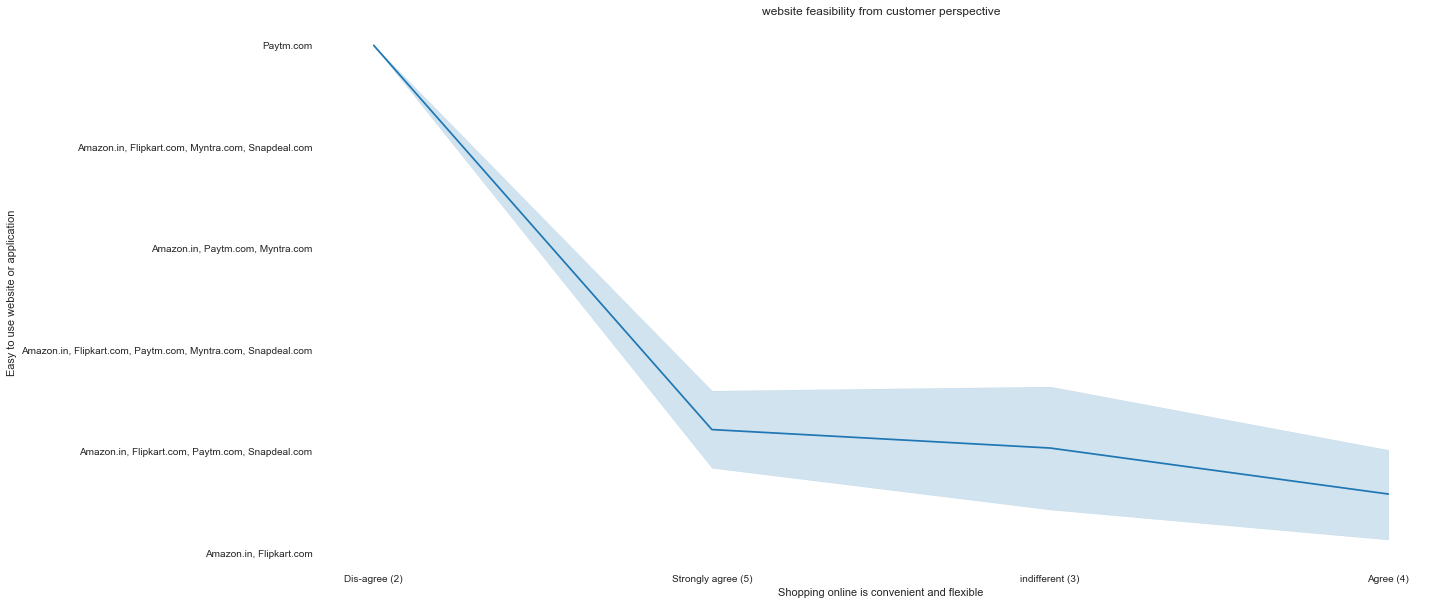

In [66]:
plt.figure(figsize=(20,10))
plt.title('website feasibility from customer perspective')
sn.lineplot(df['Shopping online is convenient and flexible'],df['Easy to use website or application'])

<AxesSubplot:xlabel='User friendly Interface of the website', ylabel='Easy to use website or application'>

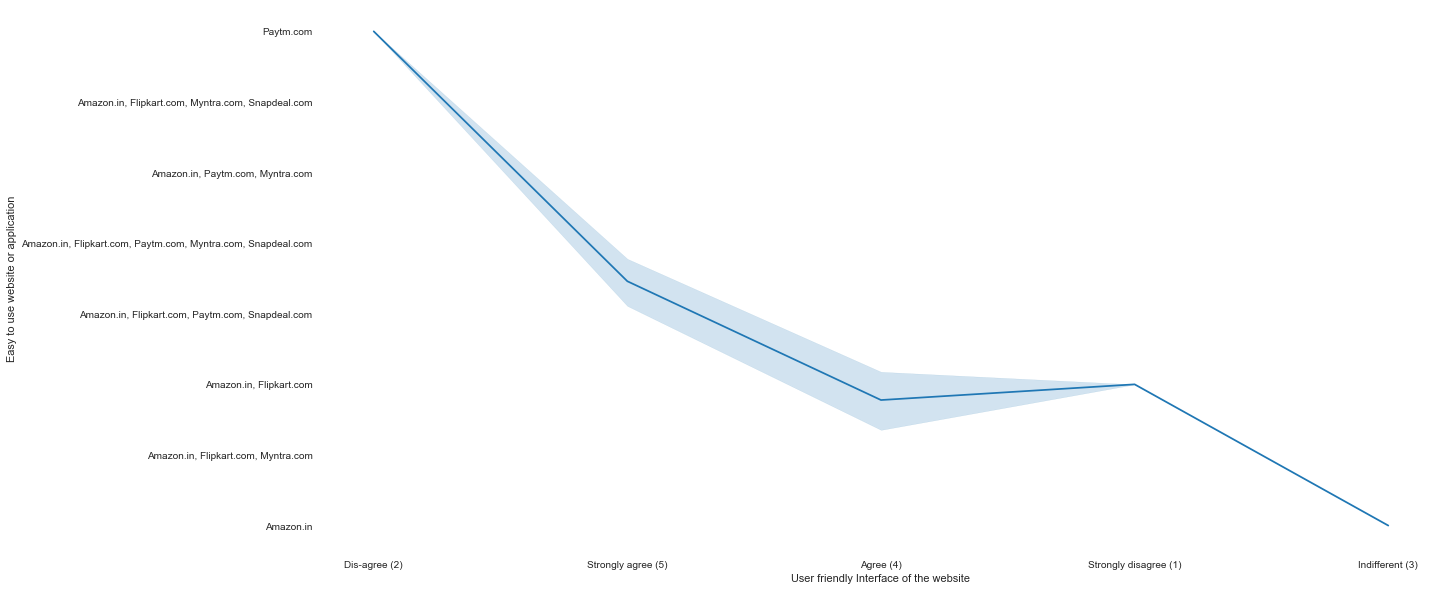

In [67]:
plt.figure(figsize=(20,10))
sn.lineplot(df['User friendly Interface of the website'],df['Easy to use website or application'])

<AxesSubplot:xlabel='Shopping online is convenient and flexible', ylabel='Website is as efficient as before'>

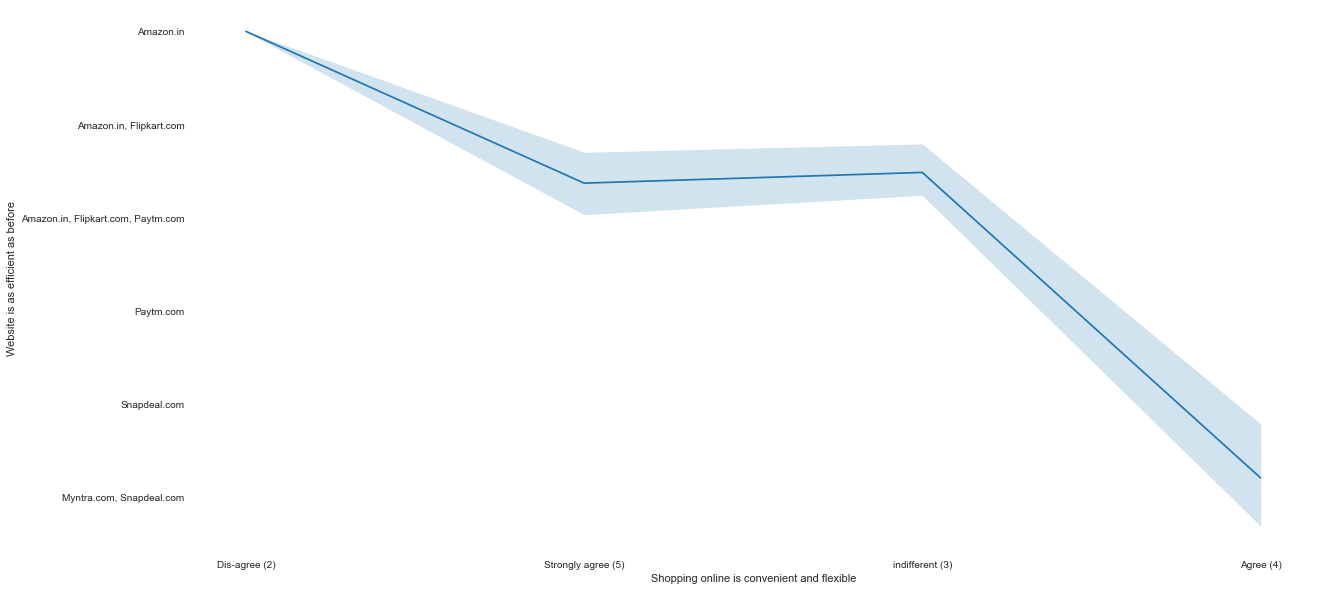

In [70]:
plt.figure(figsize=(20,10))
sn.lineplot(df['Shopping online is convenient and flexible'],df['Website is as efficient as before'])

# TRUST FACTOR

<AxesSubplot:xlabel='Trust that the online retail store will fulfill its part of the transaction at the stipulated time', ylabel='Reliability of the website or application'>

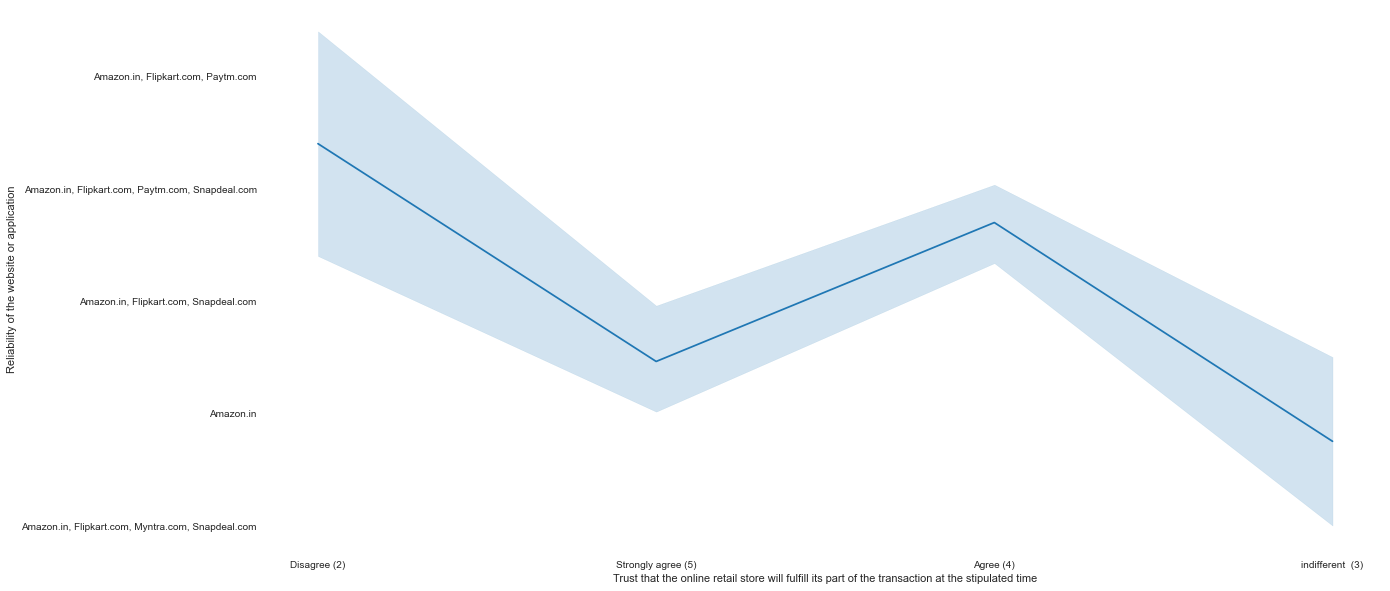

In [72]:
plt.figure(figsize=(20,10))
sn.lineplot(df['Trust that the online retail store will fulfill its part of the transaction at the stipulated time'],df['Reliability of the website or application'])

<AxesSubplot:xlabel='Empathy (readiness to assist with queries) towards the customers', ylabel='Reliability of the website or application'>

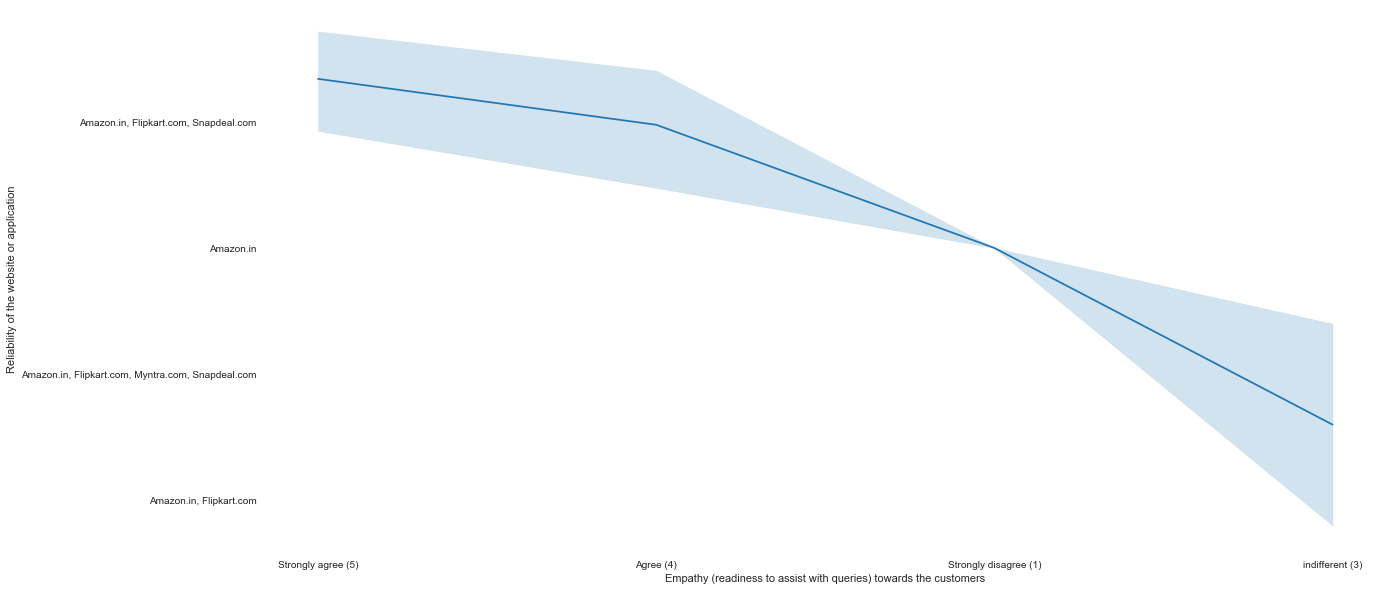

In [73]:
plt.figure(figsize=(20,10))
sn.lineplot(df['Empathy (readiness to assist with queries) towards the customers'],df['Reliability of the website or application'])